# Re-code the titanic machine learning

## Loading training set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

In [4]:
content = pd.read_csv('D:\\AI\\Assignment\\Lesson-06\\titanic\\train.csv')
# 过滤缺失数据
content = content.dropna()
content

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [5]:
age_with_fares = content[(content['Age'] > 22)&(content['Fare']<400)&(content['Fare']>130)]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

In [6]:
sub_fare

88     263.0000
118    247.5208
195    146.5208
268    153.4625
269    135.6333
299    247.5208
318    164.8667
319    134.5000
325    135.6333
332    153.4625
337    134.5000
341    263.0000
377    211.5000
438    263.0000
498    151.5500
609    153.4625
716    227.5250
730    211.3375
779    211.3375
Name: Fare, dtype: float64

In [7]:
sub_age

88     23.0
118    24.0
195    58.0
268    58.0
269    35.0
299    50.0
318    31.0
319    40.0
325    36.0
332    38.0
337    41.0
341    24.0
377    27.0
438    64.0
498    25.0
609    40.0
716    38.0
730    29.0
779    43.0
Name: Age, dtype: float64

## Definition of Machine Learning Model

In [8]:
def func(age, k, b):
    return k * age + b

## Definition of loss function

In [9]:
def loss(y, yhat):
    return np.mean(np.abs(y - yhat))

## 1. Random Choose Method to get optimal k* and *b

In [10]:
# 训练次数
LOOP_TIMES = 10000

1 loops, the current loss is 501.5893693932418
2 loops, the current loss is 67.42899718135071
4 loops, the current loss is 65.34832789174993
12 loops, the current loss is 62.819999960940095
22 loops, the current loss is 61.94545607344966
221 loops, the current loss is 61.77078111004254
549 loops, the current loss is 61.74865237622467
835 loops, the current loss is 61.51715125831034
872 loops, the current loss is 61.36497868363423
1469 loops, the current loss is 61.3170955630428
4894 loops, the current loss is 61.313066172436706
5043 loops, the current loss is 61.15721196891347
7968 loops, the current loss is 61.139111178756366
9464 loops, the current loss is 61.02875160816793


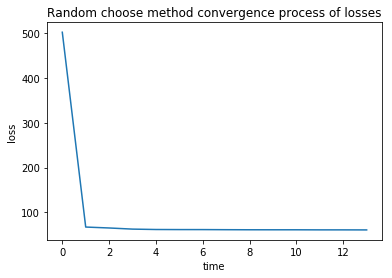

In [11]:
k_best, b_best = None, None
min_error_rate = float('inf')
loop_times = copy.deepcopy(LOOP_TIMES)
lossses = list()

while loop_times:
    
    k_hat, b_hat = random.random() * 20 - 10, random.random() * 20 - 10
    estimated_fare = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, estimated_fare)
    
    if error_rate < min_error_rate:
        k_best, b_best = k_hat, b_hat
        min_error_rate = error_rate
        print('{} loops, the current loss is {}'.format(LOOP_TIMES - loop_times + 1, error_rate))
        lossses.append(error_rate)
    
    loop_times -= 1

# 画图观察loss收敛过程
plt.title('Random choose method convergence process of losses')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(range(len(lossses)), lossses)
plt.show()

## 2.Supervised Direction to get optimal k* and *b

1 loops, the current loss is 300.77430114123877
2 loops, the current loss is 284.59851367893873
3 loops, the current loss is 280.4142725779366
4 loops, the current loss is 263.696566069384
5 loops, the current loss is 260.18152012739716
6 loops, the current loss is 221.78226563342946
7 loops, the current loss is 184.1602817396291
8 loops, the current loss is 150.87602186451318
9 loops, the current loss is 134.79106900965485
10 loops, the current loss is 120.65215165662886
11 loops, the current loss is 90.1910782627074
12 loops, the current loss is 68.9799882297593
13 loops, the current loss is 63.35617253986318
15 loops, the current loss is 61.904099812435156
21 loops, the current loss is 61.867023528470746
22 loops, the current loss is 61.76797137195514
38 loops, the current loss is 61.59830862677012
131 loops, the current loss is 61.53903628845282
207 loops, the current loss is 61.53498367956981
317 loops, the current loss is 61.47323541568151
373 loops, the current loss is 61.357394

6314 loops, the current loss is 51.764199176563636
6342 loops, the current loss is 51.752859207568854
6344 loops, the current loss is 51.72130618553985
6356 loops, the current loss is 51.63395251072026
6391 loops, the current loss is 51.54995210127628
6396 loops, the current loss is 51.519280401106734
6413 loops, the current loss is 51.508061182576704
6439 loops, the current loss is 51.506883497235094
6477 loops, the current loss is 51.467448640632405
6709 loops, the current loss is 51.4440249626853
6710 loops, the current loss is 51.41804356855594
6730 loops, the current loss is 51.38570354846124
6761 loops, the current loss is 51.25359185451813
6798 loops, the current loss is 51.22091990417277
6848 loops, the current loss is 51.187718356231976
6889 loops, the current loss is 51.17002142149435
6913 loops, the current loss is 51.09071542141523
6995 loops, the current loss is 50.95026898427222
7012 loops, the current loss is 50.94566128361944
7037 loops, the current loss is 50.880847753

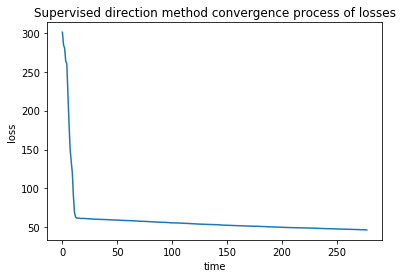

In [27]:
min_error_rate = float('inf')
loop_times = copy.deepcopy(LOOP_TIMES)
lossses = list()

direction = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
best_direction = random.choice(direction)

def step():
    return random.random() * 1.0

k_hat, b_hat = random.random() * 20 - 10, random.random() * 20 - 10
k_best, b_best = k_hat, b_hat

while loop_times:
    k_delta, b_delta = [i * step() for i in best_direction]
    k_hat, b_hat = k_best + k_delta, b_best + b_delta
    
    estimated_fare = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, estimated_fare)
    
    if error_rate < min_error_rate:
        k_best, b_best = k_hat, b_hat
        min_error_rate = error_rate
        print('{} loops, the current loss is {}'.format(LOOP_TIMES - loop_times + 1, error_rate))
        lossses.append(error_rate)
    else:
        best_direction = random.choice(list(set(direction) - set(best_direction)))
    
    loop_times -= 1

# 画图观察loss收敛过程
plt.title('Supervised direction method convergence process of losses')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(range(len(lossses)), lossses)
plt.show()

## 3.Gradient Descent to get optimal k* and *b

1 loops, the current loss is 84.36018711588689
2 loops, the current loss is 67.27439139103004
6 loops, the current loss is 64.12369887025442
14 loops, the current loss is 63.60444268885805
38 loops, the current loss is 63.55291914315171
62 loops, the current loss is 63.50139559744539
104 loops, the current loss is 63.4482100018776
200 loops, the current loss is 63.39003825672547
296 loops, the current loss is 63.331866511573345
818 loops, the current loss is 62.7220368203955
946 loops, the current loss is 62.39945653927591
992 loops, the current loss is 62.316354046201226
1020 loops, the current loss is 62.234913602988
1022 loops, the current loss is 59.53409113619079
1023 loops, the current loss is 59.247941551703256
1029 loops, the current loss is 59.20806240648299
1054 loops, the current loss is 59.18894883307579
1079 loops, the current loss is 59.1698352596686
1095 loops, the current loss is 59.05127570288192
1120 loops, the current loss is 59.03216212947471
1145 loops, the current

1973 loops, the current loss is 57.61691662095524
1977 loops, the current loss is 57.608606371647774
1981 loops, the current loss is 57.600296122340275
1985 loops, the current loss is 57.591985873032804
1989 loops, the current loss is 57.58367562372534
1993 loops, the current loss is 57.57536537441785
1997 loops, the current loss is 57.56705512511037
2001 loops, the current loss is 57.55874487580291
2005 loops, the current loss is 57.55043462649542
2009 loops, the current loss is 57.542124377187925
2013 loops, the current loss is 57.53381412788046
2017 loops, the current loss is 57.525503878572984
2021 loops, the current loss is 57.51719362926549
2025 loops, the current loss is 57.50888337995803
2029 loops, the current loss is 57.50057313065054
2033 loops, the current loss is 57.49226288134306
2037 loops, the current loss is 57.483952632035596
2041 loops, the current loss is 57.47564238272812
2045 loops, the current loss is 57.46733213342061
2049 loops, the current loss is 57.459021884

2748 loops, the current loss is 56.29087783979198
2752 loops, the current loss is 56.28256759048449
2756 loops, the current loss is 56.27425734117701
2760 loops, the current loss is 56.265947091869535
2764 loops, the current loss is 56.25763684256206
2768 loops, the current loss is 56.24932659325458
2772 loops, the current loss is 56.2410163439471
2776 loops, the current loss is 56.23270609463962
2780 loops, the current loss is 56.22439584533214
2784 loops, the current loss is 56.21608559602466
2788 loops, the current loss is 56.207775346717185
2792 loops, the current loss is 56.19946509740972
2796 loops, the current loss is 56.19115484810223
2800 loops, the current loss is 56.18284459879475
2804 loops, the current loss is 56.17453434948729
2808 loops, the current loss is 56.1662241001798
2812 loops, the current loss is 56.15791385087232
2816 loops, the current loss is 56.149603601564856
2820 loops, the current loss is 56.141293352257364
2824 loops, the current loss is 56.1329831029498

3583 loops, the current loss is 54.840185319016534
3587 loops, the current loss is 54.83187506970904
3591 loops, the current loss is 54.82356482040158
3595 loops, the current loss is 54.8152545710941
3599 loops, the current loss is 54.80694432178661
3603 loops, the current loss is 54.798634072479146
3607 loops, the current loss is 54.79032382317167
3611 loops, the current loss is 54.78201357386418
3615 loops, the current loss is 54.77370332455671
3619 loops, the current loss is 54.765393075249236
3623 loops, the current loss is 54.75708282594176
3627 loops, the current loss is 54.74877257663429
3631 loops, the current loss is 54.7404623273268
3635 loops, the current loss is 54.73215207801932
3639 loops, the current loss is 54.723841828711855
3643 loops, the current loss is 54.71553157940436
3647 loops, the current loss is 54.707221330096885
3651 loops, the current loss is 54.69891108078941
3655 loops, the current loss is 54.69060083148193
3659 loops, the current loss is 54.682290582174

4607 loops, the current loss is 52.99364792289498
4613 loops, the current loss is 52.964285042008555
4619 loops, the current loss is 52.93492216112214
4625 loops, the current loss is 52.90555928023571
4704 loops, the current loss is 52.89032382317201
4710 loops, the current loss is 52.86096094228559
4716 loops, the current loss is 52.831598061399156
4722 loops, the current loss is 52.80223518051273
4728 loops, the current loss is 52.77287229962629
4734 loops, the current loss is 52.74350941873988
4740 loops, the current loss is 52.71414653785345
4799 loops, the current loss is 52.70666731347673
4805 loops, the current loss is 52.67730443259031
4811 loops, the current loss is 52.64794155170388
4817 loops, the current loss is 52.61857867081744
4878 loops, the current loss is 52.590046814861765
4884 loops, the current loss is 52.56068393397535
4890 loops, the current loss is 52.53132105308891
4896 loops, the current loss is 52.52883513778778
4943 loops, the current loss is 52.519409695748

6845 loops, the current loss is 50.454035734529725
6852 loops, the current loss is 50.44323241042999
6859 loops, the current loss is 50.432429086330266
6866 loops, the current loss is 50.42162576223054
6873 loops, the current loss is 50.41082243813081
6880 loops, the current loss is 50.40001911403109
6887 loops, the current loss is 50.38921578993136
6894 loops, the current loss is 50.37841246583165
6901 loops, the current loss is 50.36760914173193
6908 loops, the current loss is 50.3568058176322
6915 loops, the current loss is 50.34600249353247
6922 loops, the current loss is 50.342131536680064
7004 loops, the current loss is 50.33298310295074
7011 loops, the current loss is 50.32217977885103
7018 loops, the current loss is 50.311376454751304
7025 loops, the current loss is 50.30057313065157
7032 loops, the current loss is 50.289769806551845
7039 loops, the current loss is 50.27896648245214
7046 loops, the current loss is 50.26816315835242
7053 loops, the current loss is 50.25735983425

9173 loops, the current loss is 48.39420193951619
9189 loops, the current loss is 48.37681995571868
9203 loops, the current loss is 48.36871717497327
9214 loops, the current loss is 48.36490859837797
9228 loops, the current loss is 48.34828809976302
9242 loops, the current loss is 48.33166760114807
9256 loops, the current loss is 48.32855096998717
9267 loops, the current loss is 48.319756243807355
9281 loops, the current loss is 48.30313574519239
9295 loops, the current loss is 48.29060083148304
9309 loops, the current loss is 48.28838476500105
9320 loops, the current loss is 48.27460388923673
9334 loops, the current loss is 48.25798339062177
9348 loops, the current loss is 48.25043462649692
9359 loops, the current loss is 48.24607203328105
9373 loops, the current loss is 48.2294515346661
9387 loops, the current loss is 48.21283103605115
9401 loops, the current loss is 48.21026842151082
9412 loops, the current loss is 48.20091967871043
9426 loops, the current loss is 48.184299180095465

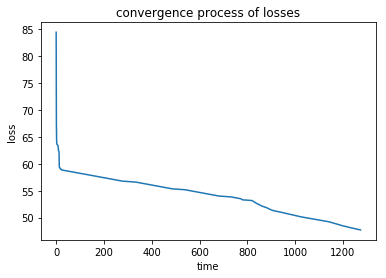

In [30]:
loop_times = copy.deepcopy(LOOP_TIMES)

def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])
def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

learning_rate = 1e-1

k_hat, b_hat = random.random() * 20 - 10, random.random() * 20 - 10
losses = []
min_error_rate = float('inf')

while loop_times > 0:

    k_delta, b_delta = -1 * learning_rate * derivate_k(sub_fare, func(sub_age,k_hat,b_hat),sub_age), -1 * learning_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))
    k_hat, b_hat = k_hat + k_delta, b_hat + b_delta

    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, estimated_fares)

    if error_rate < min_error_rate:
        min_error_rate = error_rate
        k_best, b_best = k_hat, b_hat
        print('{} loops, the current loss is {}'.format(10000 - loop_times + 1, error_rate))
        losses.append(error_rate)

    loop_times -= 1

    
# 画图观察loss的收敛过程
plt.title('convergence process of losses')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.show()